# impoting

,id,image,label,deep_features,image_array
0,24,,bird,"[0.24287176132202148, 1.0954537391662598, 0.0, 0.39362990856170654, 0.0, 0.0, 11.894915580749512, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5788496136665344, 0.4954667389392853, 2.5141289234161377, 0.0, 1.5180106163024902, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5813961029052734, 0.0, 0.0, 2.595609426498413, 2.7079553604125977, 0.0, 0.0, 0.0, 0.8509902954101562, 0.0, 0.7203489542007446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2700355052947998, 0.0, 0.0, 0.0, 0.0, 0.08592796325683594, 0.0, 0.7010231018066406, 0.0, 0.0, 0.0, 0.0, 0.024805665016174316, 0.0, 0.0, 0.17549043893814087, 0.0, 0.0, 0.0, 0.0, 0.0, 2.392784595489502, 0.0, 0.0, 4.471865653991699, 0.0, 1.6358323097229004, 0.0, 4.417484760284424, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4117904901504517, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[73.0, 77.0, 58.0, 71.0, 68.0, 50.0, 77.0, 69.0, 44.0, 120.0, 116.0, 83.0, 125.0, 120.0, 90.0, 155.0, 148.0, 117.0, 147.0, 152.0, 106.0, 133.0, 136.0, 92.0, 112.0, 101.0, 75.0, 100.0, 84.0, 68.0, 100.0, 78.0, 74.0, 69.0, 49.0, 51.0, 22.0, 16.0, 13.0, 35.0, 27.0, 24.0, 52.0, 40.0, 40.0, 70.0, 55.0, 54.0, 117.0, 97.0, 89.0, 122.0, 101.0, 99.0, 103.0, 85.0, 88.0, 88.0, 74.0, 73.0, 68.0, 59.0, 52.0, 72.0, 65.0, 52.0, 82.0, 73.0, 60.0, 84.0, 72.0, 68.0, 84.0, 67.0, 73.0, 77.0, 56.0, 65.0, 93.0, 75.0, 81.0, 117.0, 102.0, 98.0, 174.0, 171.0, 146.0, 183.0, 210.0, 149.0, 180.0, 214.0, 143.0, 185.0, 225.0, 144.0, 73.0, 74.0, 52.0, 75.0, ...]"
1,33,,cat,"[0.5250879526138306, 0.0, 0.0, 0.0, 0.0, 0.0, 9.948286056518555, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0126363039016724, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1646251678466797, 0.0, 0.0, 0.0, 0.0, 0.4600375294685364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3580564260482788, 0.0, 0.0, 3.517725944519043, 2.9159154891967773, 0.0, 0.0, 0.0, 0.0, 0.4551548957824707, 0.0, 0.0, 0.0, 0.9146482944488525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8120278716087341, 0.04379773139953613, 0.0, 1.6515014171600342, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3530466556549072, 0.0, 0.0, 1.4851171970367432, 0.0, 0.0, 0.0, 1.5763869285583496, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.6830389499664307, 1.643679141998291, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[7.0, 5.0, 8.0, 7.0, 5.0, 8.0, 5.0, 4.0, 6.0, 7.0, 4.0, 7.0, 11.0, 5.0, 9.0, 11.0, 5.0, 9.0, 17.0, 11.0, 15.0, 25.0, 19.0, 23.0, 18.0, 9.0, 17.0, 9.0, 1.0, 9.0, 13.0, 7.0, 15.0, 24.0, 19.0, 27.0, 21.0, 19.0, 25.0, 34.0, 32.0, 35.0, 52.0, 43.0, 42.0, 40.0, 27.0, 26.0, 19.0, 9.0, 10.0, 11.0, 6.0, 10.0, 20.0, 16.0, 18.0, 36.0, 29.0, 28.0, 25.0, 20.0, 22.0, 23.0, 19.0, 22.0, 32.0, 21.0, 22.0, 33.0, 26.0, 29.0, 58.0, 57.0, 61.0, 73.0, 75.0, 81.0, 83.0, 91.0, 94.0, 61.0, 68.0, 66.0, 69.0, 71.0, 66.0, 82.0, 84.0, 78.0, 80.0, 85.0, 81.0, 69.0, 73.0, 68.0, 6.0, 4.0, 8.0, 6.0, ...]"
2,36,,cat,"[0.5660159587860107, 0.0, 0.0, 0.0, 0.0, 0.0, 9.997204780578613, 0.0, 0.0, 0.0, 1.38345205783844, 0.0, 0.7764788269996643, 0.0, 0.0, 0.044802725315093994, 0.22744053602218628, 0.5177360773086548, 0.0, 1.5863749980926514, 0.0, 1.238269329071045, 0.0, 0.6377935409545898, 1.8000781536102295, 1.9250504970550537, 0.06807559728622437, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.452914237976074, 0.7830307483673096, 0.0, 0.0, 0.014504671096801758, 0.0, 0.0, 1.1913495063781738, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8588502407073975, 0.23833894729614258, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4233408570289612, 0.0, 0.9965428113937378, 2.3011531829833984, 0.0, 0.0, 0.0, 0.0, 0.0, 2.076474189758301, 0.07118624448776245, 0.0, 1.7414445877075195, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3547537922859192, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.167968273162842, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[169.0, 122.0, 65.0, 131.0, 108.0, 75.0, 193.0, 196.0, 192.0, 218.0, 221.0, 222.0, 211.0, 215.0, 216.0, 206.0, 214.0, 216.0, 200.0, 211.0, 212.0, 193.0, 206.0
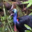
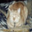
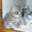
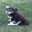
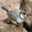
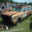
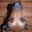
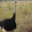
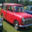
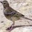

In [2]:
import turicreate as tc
image_train = tc.SFrame('image_train_data')
image_train.head().explore()

## training nearest neighbour model to retrive images

In [3]:
knn_model = tc.nearest_neighbors.create(image_train,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

## Use image retrival model

In [14]:
cat = image_train[18:19]

,SArray
0,

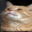

In [15]:
cat['image'].explore()

In [16]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 14.612ms     |

| Done         |         | 100         | 93.135ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [39]:
def get_images(qr):
    return image_train.filter_by(qr['reference_label'],'id')

In [40]:
cat_neighbours = get_images(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 15.104ms     |

| Done         |         | 100         | 92.078ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

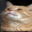
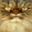
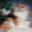
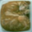
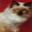

In [43]:
cat_neighbours['image'].explore()

,SArray
0,

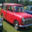

In [44]:
car = image_train[8:9]
car['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 17.169ms     |

| Done         |         | 100         | 104.649ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

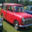
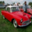
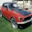
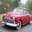
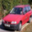

In [45]:
get_images(knn_model.query(car))['image'].explore()

# Lambda function to find images

In [48]:
show_neighbours = lambda i : get_images(knn_model.query(image_train[i:i+1]))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 15.462ms     |

| Done         |         | 100         | 95.102ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

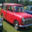
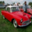
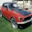
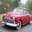
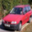

In [49]:
show_neighbours(8)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 12.995ms     |

| Done         |         | 100         | 76.346ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

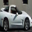
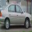
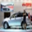
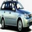
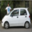

In [50]:
show_neighbours(13)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 13.188ms     |

| Done         |         | 100         | 90.327ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

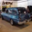
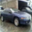
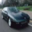
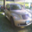
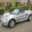

In [51]:
show_neighbours(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 12.17ms      |

| Done         |         | 100         | 88.455ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

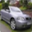
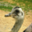
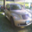
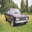
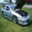

In [52]:
show_neighbours(2000)